In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/train')

label_types = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/train')
print (label_types)  

['Non Violence', 'Violence']


In [25]:
videos = []

for item in dataset_path:
 # Get all the file names
 all_videos = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/train' + '/' +item)

 # Add them to the list
 for video in all_videos:
    videos.append((item, str('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/train' + '/' +item) + '/' + video))
    
# Build a dataframe        
train_df = pd.DataFrame(data=videos, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

            tag                                         video_name
0  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
2  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
3  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
4  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
           tag                                         video_name
1010  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1011  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1012  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1013  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1014  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...


In [26]:
train_df["video_name"][10]

'C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Real Life Violence Dataset/train/Non Violence/NV_102.mp4'

In [27]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

In [28]:
dataset_path = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/test')

label_types = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/test')
print (label_types) 

['Non Violence', 'Violence']


In [30]:
videos = []

for item in dataset_path:
 # Get all the file names
 all_videos = os.listdir('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/test' + '/' +item)

 # Add them to the list
 for video in all_videos:
    videos.append((item, str('C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/test' + '/' +item) + '/' + video))
    
# Build a dataframe        
test_df = pd.DataFrame(data=videos, columns=['tag', 'video_name'])
print(test_df.head())

            tag                                         video_name
0  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
1  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
2  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
3  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
4  Non Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...


In [31]:
print(test_df.tail())

          tag                                         video_name
225  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
226  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
227  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
228  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...
229  Violence  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...


In [32]:
df = test_df.loc[:,['video_name','tag']]
df
df.to_csv('test.csv')

In [33]:
from tensorflow import keras
from imutils import paths
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
# import imageio
import cv2
import os

In [34]:
import math

In [35]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df = train_df.sample(n = len(train_df), random_state=42)
print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


Total videos for training: 1015
Total videos for testing: 230


In [36]:
train_df[:15]

Unnamed: 0                                         video_name  \
752         752  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
519         519  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
210         210  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
611         611  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
914         914  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
534         534  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
841         841  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
199         199  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
215         215  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
588         588  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
594         594  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
429         429  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
547         547  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
597         597  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   
740         740  C:/Users/Dell/OneDrive/Desktop/Desk/skill-test...   

              tag  
752      Violence  
519      Violence  
210  Non Violence  
611      Violence  
914      Violence  
534      Violence  
841      Violence  
199  Non Violence  
215  Non Violence  
588      Violence  
594      Violence  
429  Non Violence  
547      Violence  
597      Violence  
740      Violence

In [37]:
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=12, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = int(frame_count/max_frames)
    frames = []
    try:
        for i in range(max_frames):
            ret, frame = cap.read()
            if ret:
                frameId= cap.get(1)
                if (frameId==(i*frame_rate)+1):
                    frame = cv2.resize(frame, (224,224))
                    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    frame = frame/255
                    frame = frame[:, :,:]
                    frames.append(frame)
                    cap.set(cv2.CAP_PROP_POS_FRAMES, ((i+1)*frame_rate))

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)



In [43]:
video=cv2.VideoCapture("C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Real Life Violence Dataset/train/Non Violence/NV_55.mp4")
fps=video.get(cv2.CAP_PROP_FPS)
print(fps)
                       

30.0


In [46]:
frames = load_video(os.path.join("C:/Users/Dell/OneDrive/Desktop/Desk/React + Flask/Real Life Violence Dataset/train/Non Violence/NV_55.mp4"))
print(frames.shape)
frames = frames[None, ...]
frame= frames[0][0]

(12, 224, 224, 3)


In [47]:
frames.shape

(1, 12, 224, 224, 3)

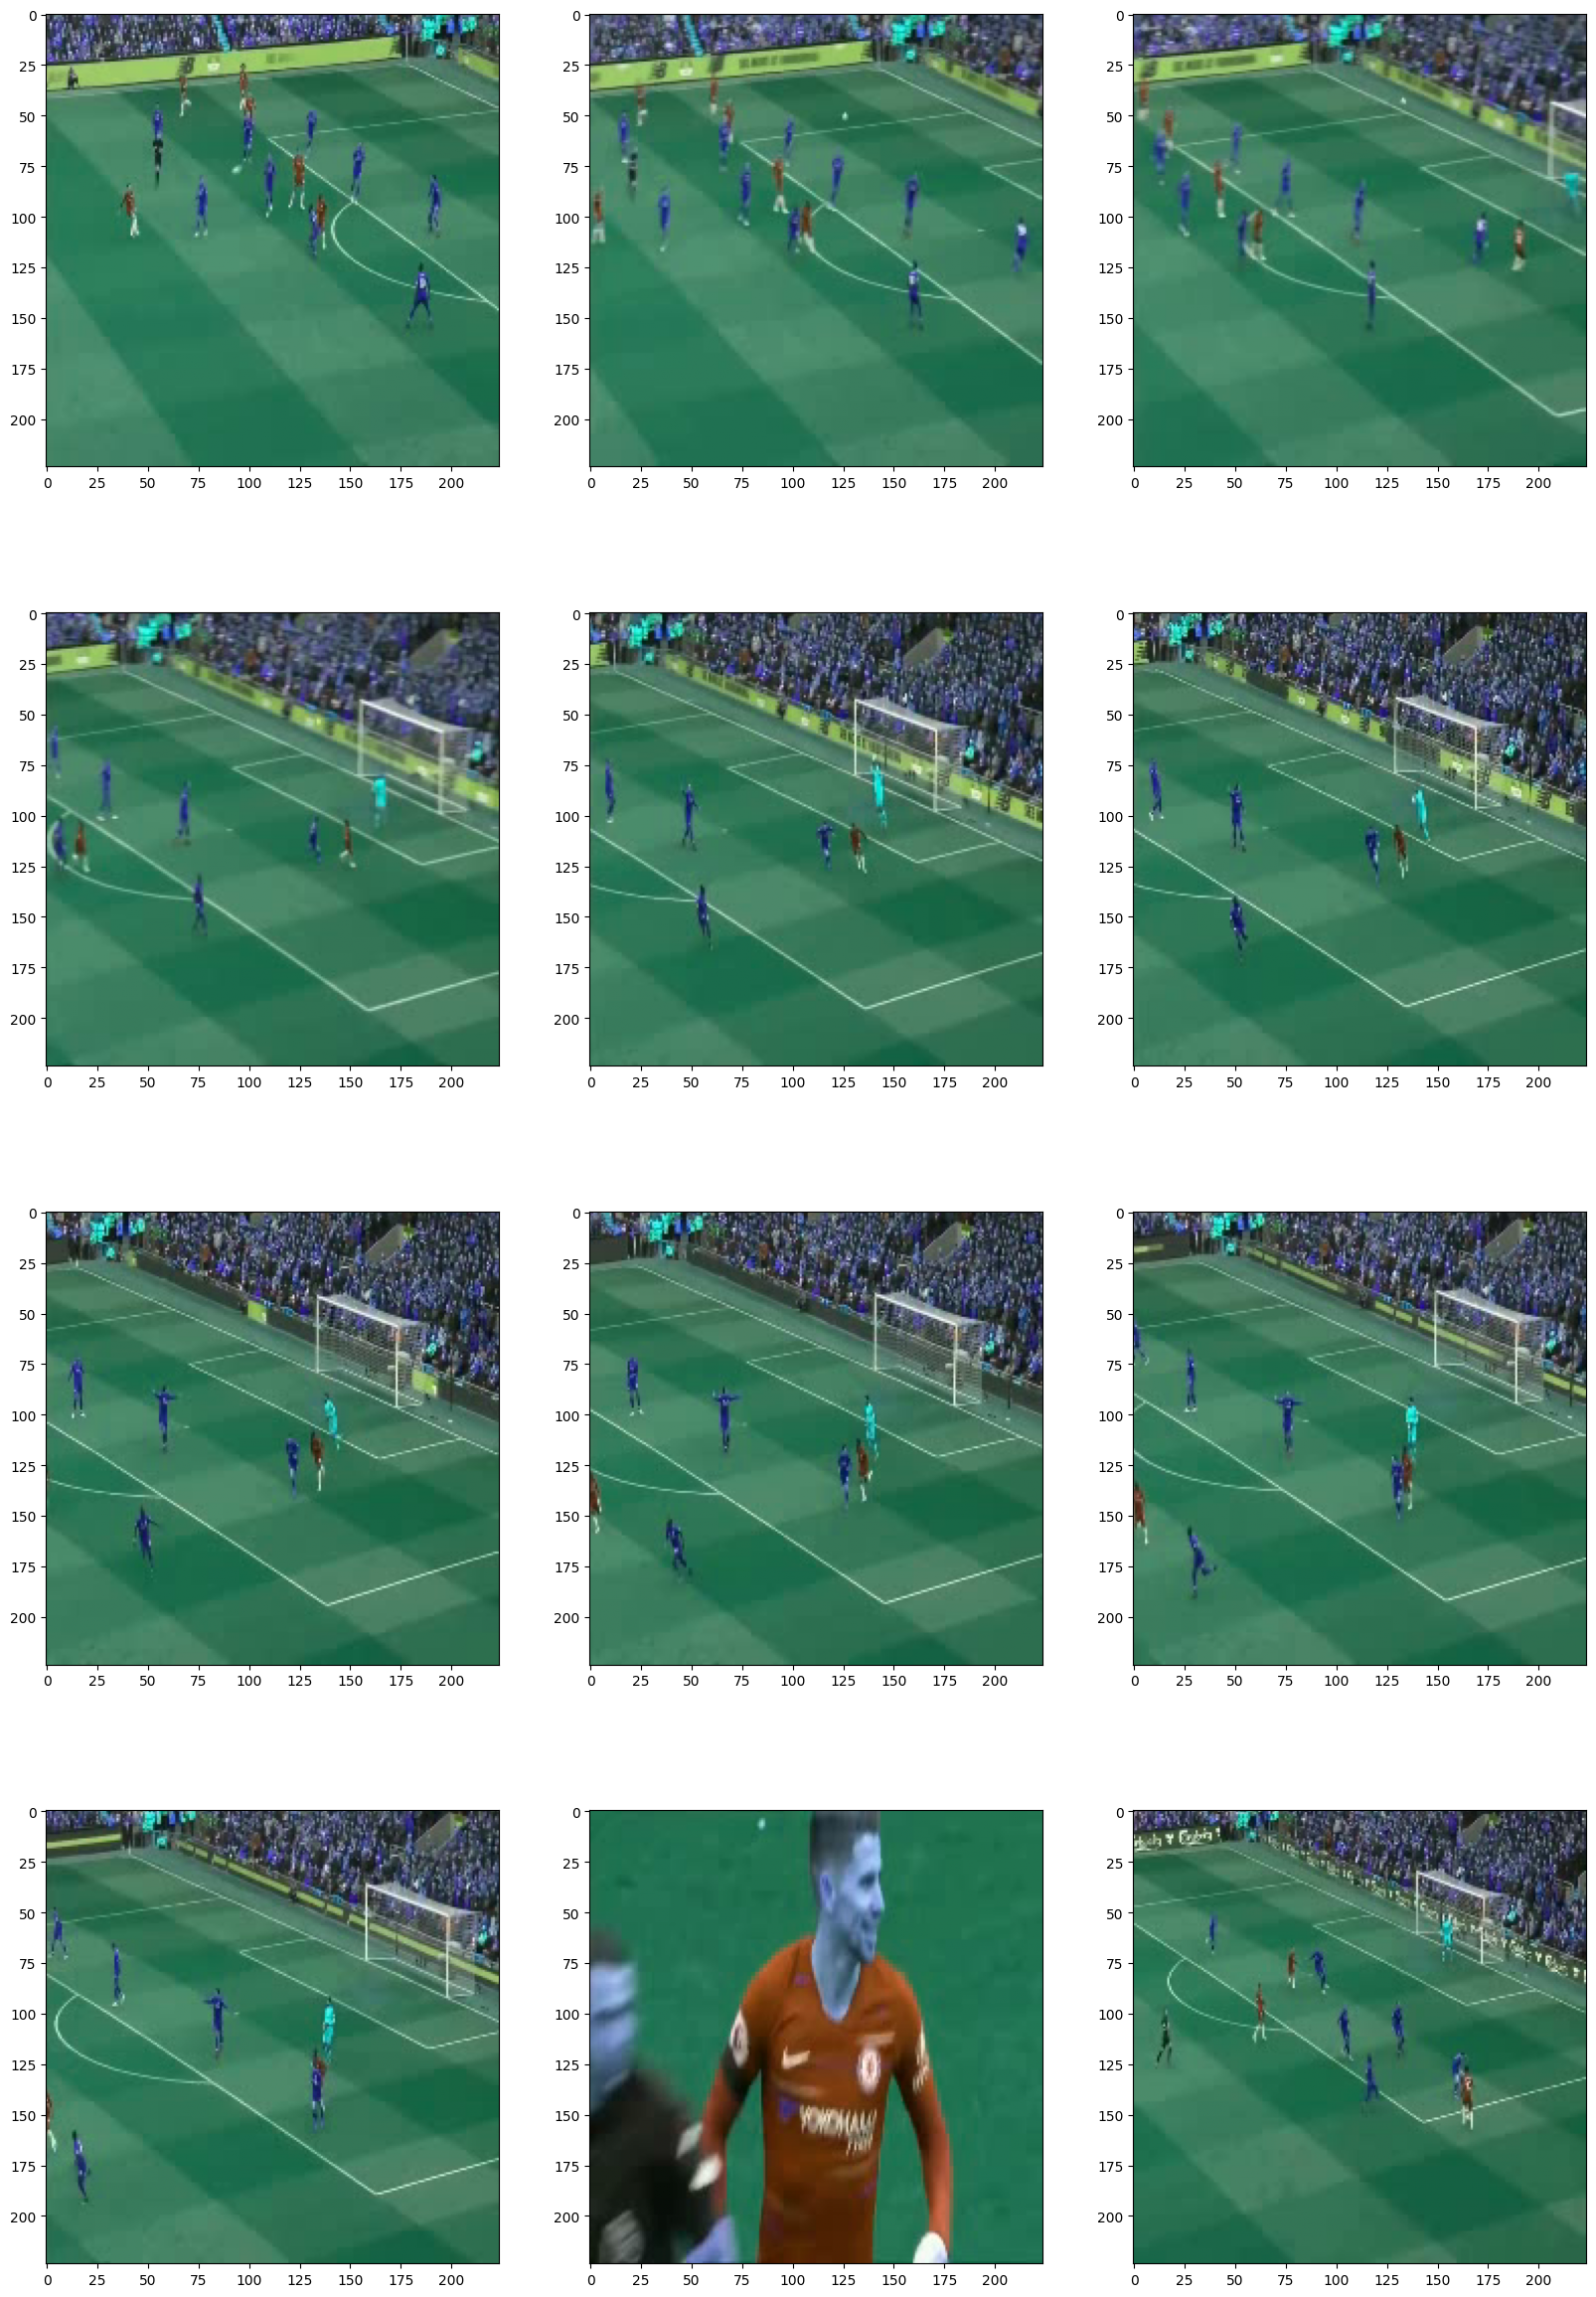

In [48]:
fig = plt.figure(figsize=(20,30))

for i in range(12):
    sub=fig.add_subplot(4,3,i+1)
    sub.imshow(frames[0][i])
    

In [49]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

In [50]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['Non Violence', 'Violence']


array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [51]:
IMG_SIZE = 224
BATCH_SIZE = 30
EPOCHS = 15

MAX_SEQ_LENGTH = 12
NUM_FEATURES = 2048

In [52]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values
    
    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 270,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #270,15,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return [frame_features, frame_masks], labels

In [53]:
train_data, train_labels = prepare_all_videos(train_df, "C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Real Life Violence Dataset/train")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

In [54]:
import pickle


In [55]:
pkl_filename1 = "traindata_1.pkl"
with open(pkl_filename1, 'wb') as file:
    pickle.dump(train_data, file)

pkl_filename2 = "trainlabels_1.pkl"
with open(pkl_filename2, 'wb') as file:
    pickle.dump(train_labels, file)

In [56]:
import pickle

In [57]:
test_data, test_labels = prepare_all_videos(test_df, "C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Real Life Violence Dataset/test")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

In [58]:
print(f"Frame features in train set: {train_data[0].shape}")
# print(f"Frame features in train set: {train_data[1].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")
print(f"train_labels in train set: {train_labels.shape}")

Frame features in train set: (1015, 12, 2048)
Frame masks in train set: (1015, 12)
train_labels in train set: (1015, 1)


In [59]:
import pickle

In [60]:
# Save to file in the current working directory


pkl_filename3 = "testdata_1.pkl"
with open(pkl_filename3, 'wb') as file:
    pickle.dump(test_data, file)

pkl_filename4 = "testlabels_1.pkl"
with open(pkl_filename4, 'wb') as file:
    pickle.dump(test_labels, file)

In [61]:
pkl_filename1 = "traindata_1.pkl"
with open(pkl_filename1, 'rb') as file:
    train_data = pickle.load(file)

pkl_filename2 = "trainlabels_1.pkl"
with open(pkl_filename2, 'rb') as file:
    train_labels=pickle.load(file)

In [62]:
pkl_filename1 = "testdata_1.pkl"
with open(pkl_filename1, 'rb') as file:
    test_data=pickle.load(file)

pkl_filename2 = "testlabels_1.pkl"
with open(pkl_filename2, 'rb') as file:
    test_labels=pickle.load(file)

In [63]:
 #x = keras.layers.GRU(8)(x)

In [64]:
test_data[1].shape

(230, 12)

In [65]:
test_data[0].shape

(230, 12, 2048)

In [66]:
print("Shape of train_data[0]:", train_data[0].shape)
print("Shape of train_data[1]:", train_data[1].shape)
print("Shape of test_data[0]:", test_data[0].shape)
print("Shape of test_data[1]:", test_data[1].shape)

Shape of train_data[0]: (1015, 12, 2048)
Shape of train_data[1]: (1015, 12)
Shape of test_data[0]: (230, 12, 2048)
Shape of test_data[1]: (230, 12)


In [67]:
def get_sequence_model():    
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    x = keras.layers.LSTM(64, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.LSTM(32)(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(32, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 50
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier_lstm.weights.h5"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only= True, verbose=1
    )
    early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.2,
        epochs=EPOCHS,
        callbacks=[checkpoint, early_stopping],
        batch_size=64
    )

    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


history, sequence_model = run_experiment()

Epoch 1/50


10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5219 - loss: 0.7178
Epoch 1: val_loss improved from inf to 0.69328, saving model to ./tmp/video_classifier_lstm.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5171 - loss: 0.7186 - val_accuracy: 0.4877 - val_loss: 0.6933
Epoch 2/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4867 - loss: 0.7259
Epoch 2: val_loss did not improve from 0.69328
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4872 - loss: 0.7229 - val_accuracy: 0.4877 - val_loss: 0.6990
Epoch 3/50
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4945 - loss: 0.6987
Epoch 3: val_loss did not improve from 0.69328
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4932 - loss: 0.6994 - val_accuracy: 0.4877 - val_loss: 0.6980
Epoch 4/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4799 - loss: 0.6990
Epoch 4: val_loss improved from 0.69328 to 0.69248, saving model to ./tmp/video_classifier_lstm.weights.h5
13/13 ━━━━━━━━━━━━━

In [68]:
filepath = "./tmp/video_classifier_lstm.weights.h5"
sequence_model.load_weights(filepath)
_, accuracy = sequence_model.evaluate([test_data[0], test_data[1]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7261 - loss: 0.6890 
Test accuracy: 47.39%


In [69]:
sequence_model.save("model_inception_LSTM.h5", save_format='h5')

In [70]:
def get_sequence_model():
    class_vocab = ['non violence', 'violence']

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.GRU(64)(frame_features_input, mask=mask_input)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(32, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    output = keras.layers.Dense(2, activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 20
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier_gru.weights.h5"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only= True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.2,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

#     seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


history, sequence_model = run_experiment()

Epoch 1/20
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5203 - loss: 0.7652
Epoch 1: val_loss improved from inf to 0.68436, saving model to ./tmp/video_classifier_gru.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5191 - loss: 0.7642 - val_accuracy: 0.5419 - val_loss: 0.6844
Epoch 2/20
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5139 - loss: 0.6995
Epoch 2: val_loss did not improve from 0.68436
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5156 - loss: 0.6990 - val_accuracy: 0.5468 - val_loss: 0.6886
Epoch 3/20
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5283 - loss: 0.6997
Epoch 3: val_loss did not improve from 0.68436
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5278 - loss: 0.6994 - val_accuracy: 0.5172 - val_loss: 0.6891
Epoch 4/20
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5762 - loss: 0.6696
Epoch 4: val_loss did not improve from 0.68436
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5764 - loss: 0.

In [71]:
filepath = "./tmp/video_classifier_gru.weights.h5"
sequence_model.load_weights(filepath)
_, accuracy = sequence_model.evaluate([test_data[0], test_data[1]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6994 - loss: 0.6120
Test accuracy: 73.91%


In [72]:
sequence_model.save("model_inception_GRU.h5", save_format='h5')

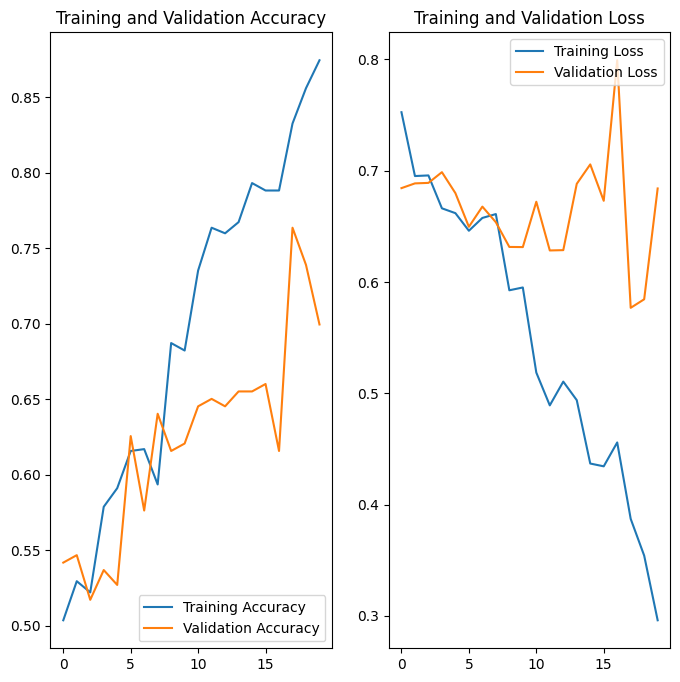

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
# filepath = "./tmp/video_classifier"
# sequence_model.load_weights(filepath)
# _, accuracy = sequence_model.evaluate([test_data[0], test_data[1]], test_labels)
# print(f"Test accuracy: {round(accuracy * 100, 2)}%")

In [75]:
test_data[0].shape

(230, 12, 2048)

In [76]:
# class_vocab = label_processor.get_vocabulary()

# frame_features_input = keras.Input([MAX_SEQ_LENGTH, NUM_FEATURES])
# #mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

# # Refer to the following tutorial to understand the significance of using `mask`:
# # https://keras.io/api/layers/recurrent_layers/gru/
# x = keras.layers.Flatten()(frame_features_input)
# x = keras.layers.Dense(512, activation="relu")(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.Dense(256, activation="relu")(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.Dense(128, activation="relu")(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.Dense(64, activation="relu")(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.Dense(16, activation="relu")(x)
# x = keras.layers.Dropout(0.2)(x)
# output = keras.layers.Dense(len(class_vocab), activation="sigmoid")(x)

# ann_model = keras.Model([frame_features_input], output)
# opt=keras.optimizers.Adam(learning_rate=0.001)
# ann_model.compile(
#     loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
# )

# ann_model.summary()

In [77]:
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input([MAX_SEQ_LENGTH, NUM_FEATURES])
    #mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.Flatten()(frame_features_input)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    # x = keras.layers.Dense(128, activation="relu")(x)
    # x = keras.layers.Dropout(0.2)(x)
    # x = keras.layers.Dense(64, activation="relu")(x)
    # x = keras.layers.Dropout(0.2)(x)
    # x = keras.layers.Dense(16, activation="relu")(x)
    # x = keras.layers.Dropout(0.2)(x)
    output = keras.layers.Dense(len(class_vocab), activation="sigmoid")(x)

    ann_model = keras.Model([frame_features_input], output)
    opt=keras.optimizers.Adam(learning_rate=0.001)
    ann_model.compile(
        loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
    )
    return ann_model

EPOCHS = 20
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier_ann_2.weights.h5"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        train_data[0],
        train_labels,
        validation_split=0.2,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )


    _, accuracy = seq_model.evaluate([test_data[0]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


history, sequence_model = run_experiment()

Epoch 1/20
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4826 - loss: 1.8910
Epoch 1: val_loss improved from inf to 0.70953, saving model to ./tmp/video_classifier_ann_2.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4825 - loss: 1.8612 - val_accuracy: 0.5172 - val_loss: 0.7095
Epoch 2/20
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4987 - loss: 0.8229
Epoch 2: val_loss improved from 0.70953 to 0.68138, saving model to ./tmp/video_classifier_ann_2.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5007 - loss: 0.8184 - val_accuracy: 0.5419 - val_loss: 0.6814
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5909 - loss: 0.6687
Epoch 3: val_loss did not improve from 0.68138
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5897 - loss: 0.6698 - val_accuracy: 0.4877 - val_loss: 0.7550
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5495 - loss: 0.6965
Epoch 4: val_loss did not improve from 0.68138
26/26 

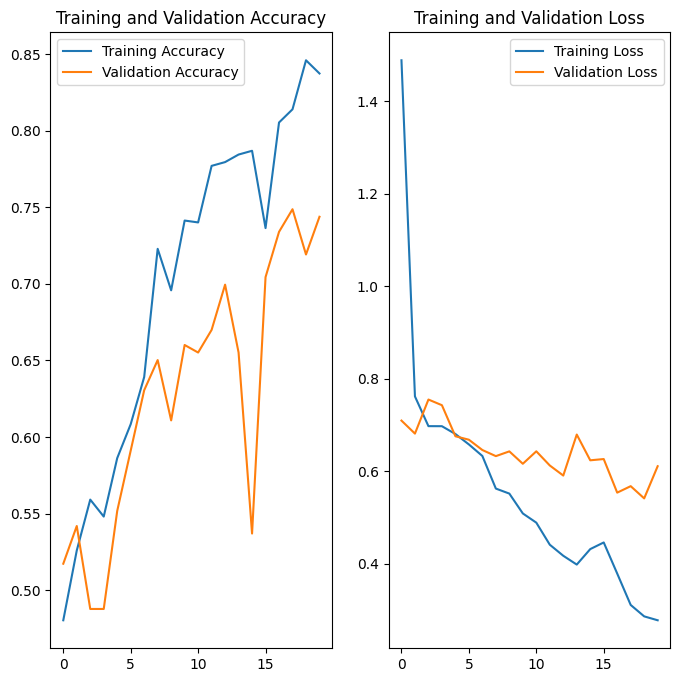

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
filepath = "./tmp/video_classifier_ann_2.weights.h5"

sequence_model.load_weights(filepath)
_, accuracy = sequence_model.evaluate([test_data[0]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.6104 
Test accuracy: 69.57%


In [80]:
sequence_model.save("model_inception_ANN.h5", save_format='h5')

In [81]:
from tensorflow.keras.models import load_model
import keras
import os
import numpy as np
import cv2

In [82]:
# recon=keras.models.load_model("model_inception_ANN.h5")

recon=keras.models.load_model("model_inception_ANN.h5")


In [83]:
recon2=keras.models.load_model("model_inception_GRU.h5")

In [84]:
recon1=keras.models.load_model("model_inception_LSTM.h5")

In [85]:
recon.evaluate([test_data[0]], test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 0.6104  


[0.6266212463378906, 0.695652186870575]

In [86]:
recon2.evaluate([test_data], test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6994 - loss: 0.6120  


[0.5193588733673096, 0.739130437374115]

In [87]:
recon1.evaluate([test_data], test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7261 - loss: 0.6890  


[0.695634126663208, 0.4739130437374115]

In [88]:
prediction = recon.predict(test_data[0])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [89]:

x=test_data[0][2]
print("Shape of x:", x.shape)
type(x)

Shape of x: (12, 2048)


numpy.ndarray

In [90]:
import tensorflow as tf

# Example 1: Reshape input data to have a defined shape
input_shape = [MAX_SEQ_LENGTH, NUM_FEATURES]
x = x.reshape((-1,) + tuple(input_shape))  

# Example 2: Convert input data to a tensor if it's a NumPy array
x = tf.convert_to_tensor(x)

# Now, you can call recon.predict() with the modified input data
print(recon.predict(x))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.657297   0.37528765]]


In [91]:
count = 0
for i in range(len(prediction)):
    if not np.array_equal(prediction[i], test_labels[i]):
        count += 1
        print(prediction[i], test_labels[i], i + 899 - 99)

print(count)

[0.85817313 0.18910594] [0] 800
[0.44471756 0.5876026 ] [0] 801
[0.65729713 0.37528738] [0] 802
[0.3968882  0.65088487] [0] 803
[0.7883382  0.25764537] [0] 804
[0.45357913 0.5764331 ] [0] 805
[0.61221683 0.41363612] [0] 806
[0.5605817 0.4603301] [0] 807
[0.6369061  0.39269364] [0] 808
[0.7396586  0.30279523] [0] 809
[0.8348578  0.21268575] [0] 810
[0.5502176 0.4706367] [0] 811
[0.58346057 0.43922105] [0] 812
[0.6891667  0.34772694] [0] 813
[0.6259871  0.40195176] [0] 814
[0.65227854 0.3795865 ] [0] 815
[0.28051275 0.79323035] [0] 816
[0.6097646  0.41575605] [0] 817
[0.60478365 0.42005908] [0] 818
[0.68899655 0.34787542] [0] 819
[0.7124038  0.32730523] [0] 820
[0.62691224 0.40116894] [0] 821
[0.66689396 0.36703724] [0] 822
[0.6537404  0.37833524] [0] 823
[0.46752435 0.5626541 ] [0] 824
[0.7547591  0.28886545] [0] 825
[0.6023021  0.42235753] [0] 826
[0.4663547 0.5762323] [0] 827
[0.41387102 0.62866163] [0] 828
[0.9194361  0.12200183] [0] 829
[0.68514013 0.3512359 ] [0] 830
[0.34104198 0.

In [92]:
# test_labels1=test_labels.reshape(2,0)

In [93]:
test_data[0].shape

(230, 12, 2048)

In [94]:
samples = test_data[0].shape[0]

In [95]:
prediction_lstm = recon1.predict(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [96]:
print(prediction_lstm.shape)
predict_lstm=[]
for i in prediction_lstm:
    x = np.argmax(i)
    predict_lstm.append(x)
predict_lstm= np.asarray(predict_lstm) 
test_labels=test_labels.reshape(samples,)
print(predict_lstm.shape)
print(test_labels.shape)

(230, 2)
(230,)
(230,)


In [97]:
predict_lstm_prob=prediction_lstm[:,1]
print(predict_lstm_prob[:10])
print(prediction_lstm[:10])


[0.4958735  0.49441713 0.49366888 0.49448618 0.49499172 0.49712124
 0.49590573 0.49530378 0.49438888 0.49297678]
[[0.5041265  0.4958735 ]
 [0.5055828  0.49441713]
 [0.5063311  0.49366888]
 [0.50551385 0.49448618]
 [0.5050082  0.49499172]
 [0.5028787  0.49712124]
 [0.5040943  0.49590573]
 [0.5046962  0.49530378]
 [0.5056112  0.49438888]
 [0.5070232  0.49297678]]


In [98]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predict_lstm, 
                           target_names=["NonViolence", "Violence"]))

              precision    recall  f1-score   support

 NonViolence       0.47      1.00      0.64       109
    Violence       0.00      0.00      0.00       121

    accuracy                           0.47       230
   macro avg       0.24      0.50      0.32       230
weighted avg       0.22      0.47      0.30       230



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [99]:
from sklearn.metrics import auc

In [100]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(test_labels, predict_lstm_prob)

0.33440746076275685

In [101]:
predict_lstm_prob

array([0.4958735 , 0.49441713, 0.49366888, 0.49448618, 0.49499172,
       0.49712124, 0.49590573, 0.49530378, 0.49438888, 0.49297678,
       0.49316254, 0.49498498, 0.49643028, 0.496534  , 0.49710777,
       0.49496967, 0.4956964 , 0.49308804, 0.49312124, 0.49525735,
       0.4956944 , 0.49610898, 0.4943558 , 0.49550986, 0.49316087,
       0.49303684, 0.49308676, 0.49329618, 0.49320877, 0.49510044,
       0.49335733, 0.4948893 , 0.4931497 , 0.49308908, 0.49313238,
       0.493028  , 0.4942921 , 0.49297622, 0.49421662, 0.49495375,
       0.4948084 , 0.494199  , 0.4942317 , 0.49526748, 0.4959608 ,
       0.49514318, 0.4976891 , 0.49559873, 0.49530107, 0.4951307 ,
       0.49489257, 0.49486333, 0.49764204, 0.49646986, 0.49605608,
       0.4961016 , 0.49632454, 0.496317  , 0.49575758, 0.49472162,
       0.4932084 , 0.49326634, 0.49410903, 0.49343634, 0.49345526,
       0.49357098, 0.4961715 , 0.49432254, 0.49477684, 0.49350715,
       0.49491614, 0.49325508, 0.4931126 , 0.49391785, 0.49412

[1.4976891  0.4976891  0.496317   0.4961844  0.4959608  0.4959579
 0.4959434  0.49594066 0.4958735  0.49585035 0.49559873 0.49551135
 0.4954991  0.4953348  0.4953257  0.49531382 0.49525735 0.49520773
 0.49510044 0.49506748 0.49498498 0.4949835  0.49495375 0.49495327
 0.4948893  0.49487105 0.49486333 0.49482626 0.4948084  0.49479163
 0.49477684 0.49472418 0.49472162 0.49461278 0.49448618 0.49445716
 0.49438888 0.49436763 0.4943558  0.49434435 0.4943425  0.4943278
 0.49432254 0.49430925 0.4942921  0.49424723 0.494199   0.49418727
 0.49417704 0.49416366 0.49414662 0.49413848 0.49412692 0.4941132
 0.49410903 0.49407783 0.4940768  0.49405342 0.4939786  0.49393687
 0.49391785 0.4938886  0.49379322 0.49376458 0.49372602 0.49367982
 0.49366888 0.49365652 0.49357098 0.49353316 0.493482   0.493463
 0.49345526 0.49344972 0.49343634 0.493363   0.49326634 0.49326086
 0.49325508 0.4932091  0.4932084  0.4932074  0.49320528 0.49318725
 0.49318615 0.49316302 0.49316254 0.4931611  0.4931497  0.49313504


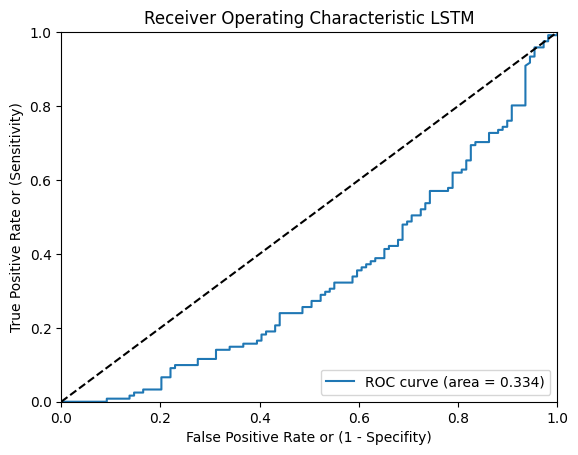

In [102]:
fpr, tpr, thresholds = roc_curve(test_labels, predict_lstm_prob)
roc_auc = auc(fpr, tpr)
print(thresholds)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic LSTM')
plt.legend(loc="lower right")


In [103]:
print(predict_lstm[:30])
test_labels[:30]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [104]:
from sklearn.metrics import f1_score

f1 = f1_score(predict_lstm, test_labels)
f1= f1
print("%.2f"%f1)

0.00


In [105]:
cm = tf.math.confusion_matrix(labels=test_labels, predictions=predict_lstm, num_classes=2)

In [106]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[109,   0],
       [121,   0]])>

Text(33.22222222222222, 0.5, 'Truth')

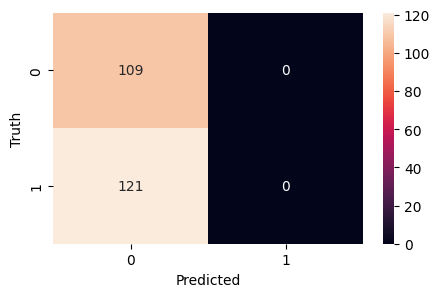

In [107]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [108]:
print(prediction.shape)
predict=[]
for i in prediction:
    x = np.argmax(i)
    predict.append(x)
predict= np.asarray(predict)   

(230, 2)


In [109]:
predict = predict.reshape(samples)
predict

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [110]:
from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve

In [111]:
prediction


array([[0.85817313, 0.18910594],
       [0.44471756, 0.5876026 ],
       [0.65729713, 0.37528738],
       [0.3968882 , 0.65088487],
       [0.7883382 , 0.25764537],
       [0.45357913, 0.5764331 ],
       [0.61221683, 0.41363612],
       [0.5605817 , 0.4603301 ],
       [0.6369061 , 0.39269364],
       [0.7396586 , 0.30279523],
       [0.8348578 , 0.21268575],
       [0.5502176 , 0.4706367 ],
       [0.58346057, 0.43922105],
       [0.6891667 , 0.34772694],
       [0.6259871 , 0.40195176],
       [0.65227854, 0.3795865 ],
       [0.28051275, 0.79323035],
       [0.6097646 , 0.41575605],
       [0.60478365, 0.42005908],
       [0.68899655, 0.34787542],
       [0.7124038 , 0.32730523],
       [0.62691224, 0.40116894],
       [0.66689396, 0.36703724],
       [0.6537404 , 0.37833524],
       [0.46752435, 0.5626541 ],
       [0.7547591 , 0.28886545],
       [0.6023021 , 0.42235753],
       [0.4663547 , 0.5762323 ],
       [0.41387102, 0.62866163],
       [0.9194361 , 0.12200183],
       [0.

In [112]:
print(metrics.classification_report(test_labels, predict, 
                           target_names=["NonViolence", "Violence"]))

              precision    recall  f1-score   support

 NonViolence       0.67      0.72      0.69       109
    Violence       0.73      0.68      0.70       121

    accuracy                           0.70       230
   macro avg       0.70      0.70      0.70       230
weighted avg       0.70      0.70      0.70       230



In [113]:
predict_gru_prob=prediction[:,1]
print(predict_gru_prob[:10])
print(prediction[:10])

[0.18910594 0.5876026  0.37528738 0.65088487 0.25764537 0.5764331
 0.41363612 0.4603301  0.39269364 0.30279523]
[[0.85817313 0.18910594]
 [0.44471756 0.5876026 ]
 [0.65729713 0.37528738]
 [0.3968882  0.65088487]
 [0.7883382  0.25764537]
 [0.45357913 0.5764331 ]
 [0.61221683 0.41363612]
 [0.5605817  0.4603301 ]
 [0.6369061  0.39269364]
 [0.7396586  0.30279523]]


In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, predict_gru_prob)

0.7637046023201152

In [115]:
predict_ann_prob=prediction[:,1]
print(predict_ann_prob[:15])
print(prediction[:15])
print(test_labels[:15])


[0.18910594 0.5876026  0.37528738 0.65088487 0.25764537 0.5764331
 0.41363612 0.4603301  0.39269364 0.30279523 0.21268575 0.4706367
 0.43922105 0.34772694 0.40195176]
[[0.85817313 0.18910594]
 [0.44471756 0.5876026 ]
 [0.65729713 0.37528738]
 [0.3968882  0.65088487]
 [0.7883382  0.25764537]
 [0.45357913 0.5764331 ]
 [0.61221683 0.41363612]
 [0.5605817  0.4603301 ]
 [0.6369061  0.39269364]
 [0.7396586  0.30279523]
 [0.8348578  0.21268575]
 [0.5502176  0.4706367 ]
 [0.58346057 0.43922105]
 [0.6891667  0.34772694]
 [0.6259871  0.40195176]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [116]:
roc_auc_score(test_labels, predict_ann_prob)

0.7637046023201152

In [117]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

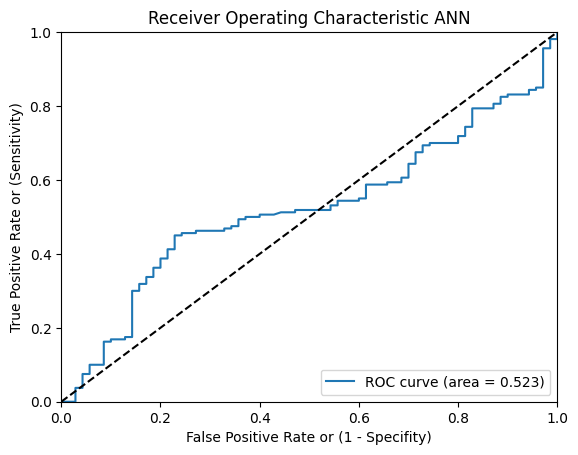

In [118]:
fpr, tpr, thresholds = roc_curve(test_labels, predict_ann_prob,pos_label=predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic ANN')
plt.legend(loc="lower right")

In [119]:
f1 = f1_score(predict, test_labels)

In [120]:
print(f1)

0.7008547008547009


Text(33.22222222222222, 0.5, 'Truth')

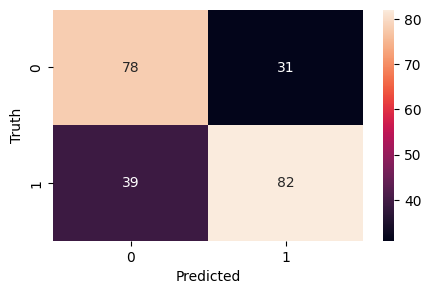

In [121]:
cm1 = tf.math.confusion_matrix(labels=test_labels, predictions=predict, num_classes=2)
plt.figure(figsize=(5,3))
sn.heatmap(cm1,annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [122]:
class_vocab = label_processor.get_vocabulary()
class_vocab

['Non Violence', 'Violence']

In [124]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = recon.predict(frame_features)[0]
    res=[]
    for i in np.argsort(probabilities)[::-1]:
        print(f"{class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
        x = f"{class_vocab[i]}: {probabilities[i] * 100:5.2f}%"
        res.append(x)
    return res

# test_video = np.random.choice(test_df["video_name"].values.tolist())
test_video = "C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Violence detection/Real Life Violence Dataset/train/Non Violence/NV-57.mp4"
print(f"Test video path: {test_video}")

str1 = sequence_prediction(test_video)
str1

Test video path: C:/Users/Dell/OneDrive/Desktop/Desk/skill-test/React + Flask/Violence detection/Real Life Violence Dataset/train/Non Violence/NV-57.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Violence: 51.41%
Non Violence: 50.73%


['Violence: 51.41%', 'Non Violence: 50.73%']